(a) Simulate the performance of Alamouti two-antenna transmit diversity. Create a random stream of, say, 1000 QPSK symbols $(±1 ± j)/√2$. Generate a sequence of channel matrices by moving the receiver (or transmitter) through a multipath environment slowly enough that the slow fading assumption holds, but fast enough that the channel is random over the whole simulation. Generate complex Gaussian noise with variance $σ^2_η$ to simulate noise at the receiver. Assuming the receiver knows the channel perfectly, detect the symbols using the Alamouti scheme. Compute the symbol error rate as the ratio of incorrectly decoded symbols to the total number of symbols. Repeat for different values of SNR, and plot the symbol error rate on a log scale as a function of SNR in dB.

ValueError: x and y must have same first dimension, but have shapes (500,) and (2,)

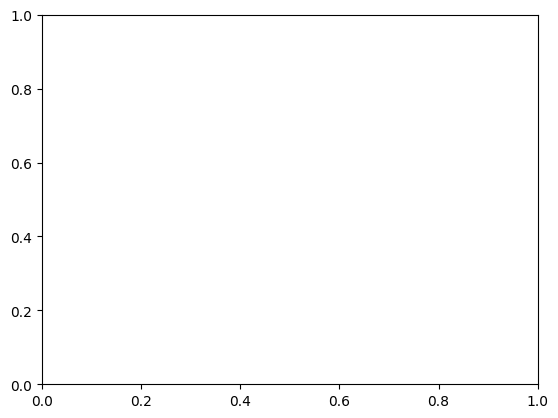

In [ ]:
# Scatterer multipath propagation model
import numpy as np
import matplotlib.pyplot as plt

# parameters
f = 1e9         # frequency
c0 = 3e8        # speed of light
lam = c0/f      # wavelength
k = 2*np.pi/lam # wavenumber
eta = 377       # impedance of free space

# Create a random stream of 1000 QPSK symbols (±1 ± j)/√2
num_symbols = 1000
bits_i = np.random.randint(0, 2, num_symbols)   # in-phase bits
bits_q = np.random.randint(0, 2, num_symbols)   # quadrature bits
symbols_i = (2*bits_i - 1)/np.sqrt(2)           # in-phase symbols
symbols_q = (2*bits_q - 1)/np.sqrt(2)           # quadrature symbols
qpsk_symbols = symbols_i + 1j*symbols_q         # complex symbols
qpsk_symbols = qpsk_symbols[:2 * (num_symbols // 2)]  # Make it even
qpsk_blocks = qpsk_symbols.reshape(-1, 2)  # Shape: [num_blocks, 2]
num_blocks = qpsk_blocks.shape[0]

# Simulate the performance of Alamouti two-antenna transmit diversity
points = num_blocks                 # number of points to simulate
Nt = 2                              # transmit antennas
Nr = 1                              # receive antennas
d = 0.4*lam                         # element spacing
x_t = 0                             # transmitter location in x direction
y_t = 0                             # transmitter location in y direction
x_r = np.linspace(-10, 10, points)  # moving receiver locations in x direction
y_r = np.zeros(points)              # static receiver locations in y direction

# Generate a sequence of channel matrices by moving the receiver (or transmitter) through a multipath environment
# Repeat for different values of SNR
x_s = np.random.uniform(-10, 10, points)    # x-coordinates of scatterers
y_s = np.random.uniform(-10, 10, points)    # y-coordinates of scatterers
ref_coef = -1                               # reflection coefficient
SNRt_dB = np.linspace(0, 30, points)        # SNR in dB
SNRt = 10**(SNRt_dB/10)                     # SNR in linear scale

# calculate an array of channel matrices
H = np.zeros([points, Nt, Nr], dtype=complex)   # channel matrices
for m in range(0,points):
    # calculate the fields
    for n in range(0,Nt):
        # element positions within the tx array
        x_t_e = x_t + n*d
        # distance between scatterer and receiver
        delta_r = np.sqrt((x_t_e - x_s[m])**2 + (y_t - y_s[m])**2) \
                - np.sqrt((x_s[m] - x_r[m])**2 + (y_s[m] - y_r[m])**2) 
        # received field
        H[m, n, 0] = 1+ref_coef*np.exp(-1j*k*delta_r)

# Generate complex Gaussian noise with variance σ^2_η to simulate noise at the receiver
mean_noise = 0  # noise mean
var_noise = 0.1 # noise variance
noise_std = np.sqrt(var_noise / 2)  # noise standard deviation
noise = noise_std * (np.random.randn(num_blocks) + 1j * np.random.randn(num_blocks))
x = np.zeros([num_blocks, Nt], dtype=complex)                               # received signal
for m in range(0,num_blocks):
    s0, s1 = qpsk_blocks[m]                                                 # symbols to be transmitted
    x[m, 0] = np.dot(H[m, :, 0], [s0, s1]) + noise[m]                       # First time slot
    x[m, 1] = np.dot(H[m, :, 0], [-np.conj(s1), np.conj(s0)]) + noise[m]    # Second time slot

# detect the symbols using the Alamouti scheme
decoded_symbols = np.zeros([num_blocks, Nt], dtype=complex)         # decoded symbols
for m in range(0,num_blocks):
    A = np.array([[H[m, 0, 0], H[m, 1, 0]],
                  [np.conj(H[m, 1, 0]), -1*np.conj(H[m, 0, 0])]])   # Alamouti scheme
    x_mult = np.array([x[m, 0], np.conj(x[m, 1])])                  # received signal
    decoded_symbols[m,:] = np.dot(np.linalg.pinv(A), x_mult.T)        # decode the symbols

# Compute the symbol error rate as the ratio of incorrectly decoded symbols to the total number of symbols. 
bit_error_rate = np.array([num_blocks, 0], dtype=int)  # number of errors
for i in range(0, num_blocks):
    errors
    # Compare the detected symbols with the transmitted symbols
    if decoded_symbols[i, 0] != qpsk_blocks[i][0]:
        errors += 1
    if decoded_symbols[i, 1] != qpsk_blocks[i][1]:
        errors += 1
bit_error_rate = errors / num_symbols

# plot the symbol error rate on a log scale as a function of SNR in dB
plt.plot(SNRt_dB, 10*np.log10(bit_error_rate), 'o-')
plt.title('Symbol Error Rate vs SNR (dB)')
plt.xlabel('SNR (dB)')
plt.ylabel('Symbol Error Rate (dB)')
plt.grid()
plt.xlim([0, 30])
plt.ylim([-10, 0])


(b) Repeat for the case of no transmit diversity. Overlay the results on the same plot. To make this a fair comparison, the transmit symbols
should not be divided by √2, so that the same total transmit power as in the Alamouti case is supplied to a single antenna.